# Plotting Lab

In the `datasets/` folder in this notebook you will find the `salary` dataset.

- `salary.csv` -- a dataset comparing salary data across gender and tenure lines for academics 

Your task is to use Matplotlib and Seaborn to create high-quality plots for this dataset. 

**Your deliverable for this lab is to push a completed version to your Github Enterprise account by Sunday. This is a required homework assignment.**

Part of effective data science work is to be able to take new datasets and investigate them for interesting correlations or relationships that might be the basis of future research or investigation. Take this lab as an opportunity to practice those skills as well and how plotting can help you in that goal!

##### Useful Workflow Tips

1. Open the data and do a quick EDA:
  - How many rows and columns?
  - Is there missing data?
  - What do each of the columns mean?
    - Sometimes it may not be clear at first glance so double check
    - **Googling for some insight into that domain (such as salary information for the academic world) is not just highly encouraged, but may be 100% required in some cases**
  - At first glance, are there columns that you think might have an interesting relationship?
2. Begin plotting:
  - Use something like seaborn's pairplot to visualize overall relationships
  - Start digging into bivariate (involving or depending on two variables) relationships
  - If a variable of interest is encoded as a string, perform a Pandas method to convert it into numeric values, if possible.
3. Refine plots:
  - Try different plotting types / plotting options to create accurate, interesting, and engaging plots
  - Remember to include titles, axes labels, etc.
  - **Does your plot have a story? What should a reader take away from your plots?**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Salary

In [30]:
salary = pd.read_csv('datasets/salary.csv')
salary.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


- `sx` -> sex (gender)
- `rk` -> rank (full, associate, assistant)
- `yr` -> years of service or years in field
- `dg` -> last degree earned
- `yd` -> years since degree
- `sl` -> salary

#### `1. How many rows and columns?`

In [31]:
# 57 rows and 6 columns
salary.shape

(57, 6)

#### `2. Check for missing values. Address if needed.`

In [32]:
salary.isnull().sum()

sx    0
rk    0
yr    0
dg    0
yd    0
sl    0
dtype: int64

#### `3. Review datatypes for each column in your dataframe. Per the instructions above, convert any as needed.`

In [33]:
salary.dtypes

sx    object
rk    object
yr     int64
dg    object
yd     int64
sl     int64
dtype: object

#### `4. Visualize the distributions of the series or columns in your dataframe.`
- `What type or types of plots are most appropriate here?`
- `What variables are categorical (labels)?`
- `Which are continuous?`
- `Are any ordinal?`

#### `4a. What type or types of plots are most appropriate here?`

**For numerical variables:** years of service (yr), years since last degree (yd), and salary (sl), it's most appropriate to use histograms and/or boxplots. Below are distributions of all the three variables using histograms and boxplots.

In [34]:
# But first we will describe the variables
salary.describe()

,yr,yd,sl
count,57.000000,57.000000,57.000000
mean,7.280702,15.912281,24037.771930
std,5.351083,9.901805,5719.879566
min,0.000000,1.000000,15000.000000
25%,3.000000,7.000000,19175.000000
50%,7.000000,15.000000,24675.000000
75%,10.000000,23.000000,27600.000000
max,25.000000,35.000000,38045.000000


#### Histograms:

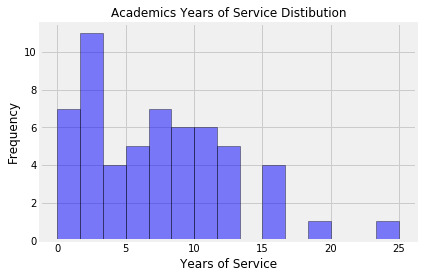

In [35]:
# Histogram of Academics Years of Service Distibution
bins = salary.yr.plot(kind='hist', bins=15, facecolor='blue', alpha=0.5, edgecolor='black', linewidth=0.75);
plt.xlabel('Years of Service');
plt.ylabel('Frequency');
plt.title('Academics Years of Service Distibution', color = 'black',fontsize = 12);

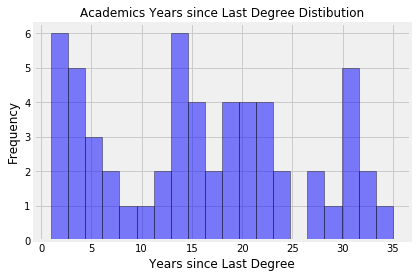

In [36]:
# Histogram of Academics Years since Last Degree Distibution
bins = salary.yd.plot(kind='hist', bins=20, facecolor='blue', alpha=0.5, edgecolor='black', linewidth=0.75);
plt.xlabel('Years since Last Degree');
plt.ylabel('Frequency');
plt.title('Academics Years since Last Degree Distibution', color = 'black',fontsize = 12);

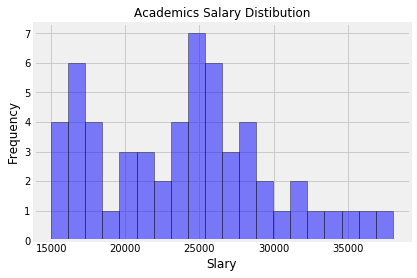

In [37]:
# Histogram of Academics Salary Distibution
bins = salary.sl.plot(kind='hist', bins=20, facecolor='blue', alpha=0.5, edgecolor='black', linewidth=0.75);
plt.xlabel('Slary');
plt.ylabel('Frequency');
plt.title('Academics Salary Distibution', color = 'black',fontsize = 12);

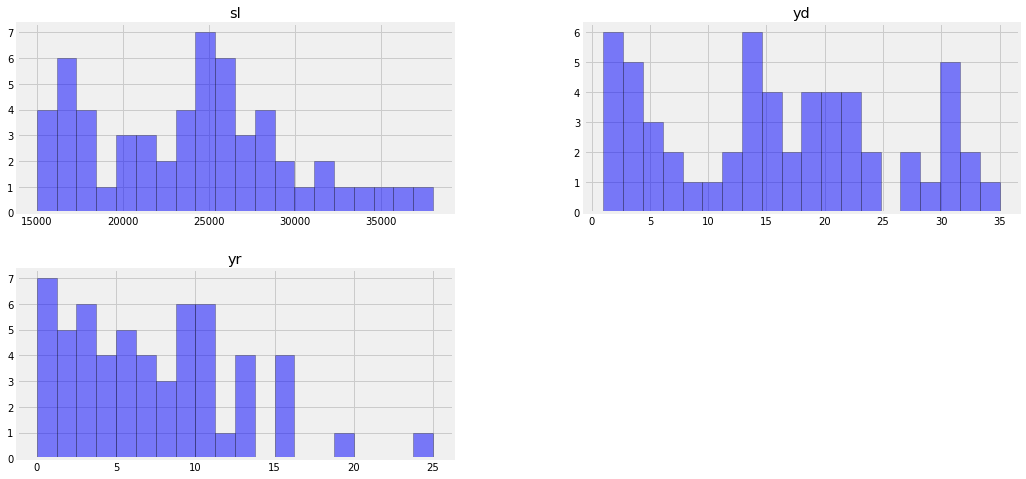

In [38]:
# To show distibutions of all numerical values, we can use a histogram over dataset
salary.hist(bins=20, figsize=(16,8), facecolor='blue', alpha=0.5, edgecolor='black');

#### Box ploting:

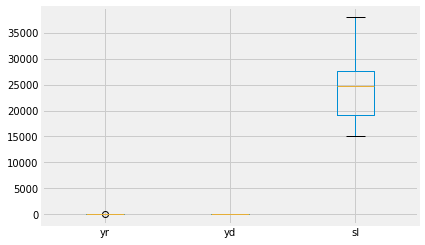

In [39]:
# Visualizing all numerical variables using boxplots
salary.boxplot();

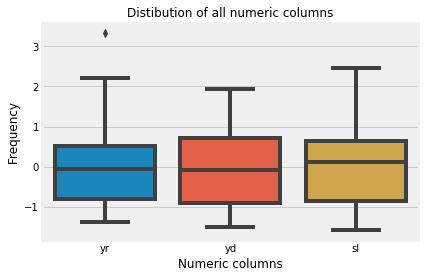

In [40]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

# iniate it
s = StandardScaler()

# use stander scaler to get standrised values for all columns
temp = s.fit_transform(salary[salary.describe().columns])

# re create the data frame contain only numeric variables and standrised 
temp = pd.DataFrame(s.fit_transform(salary[salary.describe().columns]) , columns= salary.describe().columns)

# Boxplot of Distibution of all numeric columns
sns.boxplot(data = temp);
plt.xlabel('Numeric columns');
plt.ylabel('Frequency');
plt.title('Distibution of all numeric columns', color = 'black',fontsize = 12);

However it's not a good representaion here as the numbers in the three variables have different ranges. To better see the distribution using box plot, we will draw each one separately.

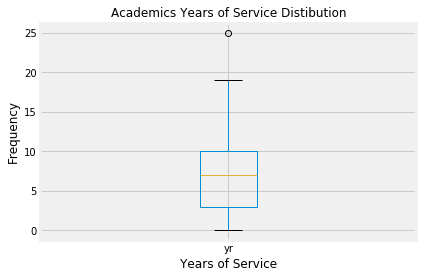

In [41]:
# Boxplot of Academics Years of Service Distibution
salary.yr.plot(kind='box');
plt.xlabel('Years of Service');
plt.ylabel('Frequency');
plt.title('Academics Years of Service Distibution', color = 'black',fontsize = 12);

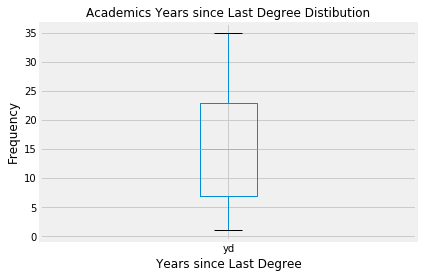

In [42]:
# Boxplot of Academics Years since Last Degree Distibution
salary.yd.plot(kind='box');
plt.xlabel('Years since Last Degree');
plt.ylabel('Frequency');
plt.title('Academics Years since Last Degree Distibution', color = 'black',fontsize = 12);

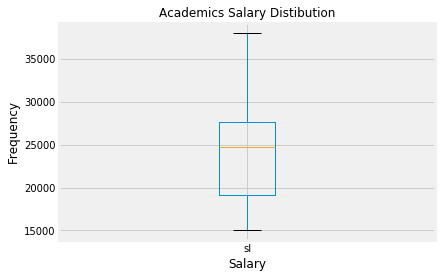

In [43]:
# Boxplot of Academics Salary Distibution
salary.sl.plot(kind='box');
plt.xlabel('Salary');
plt.ylabel('Frequency');
plt.title('Academics Salary Distibution', color = 'black',fontsize = 12);

#### `4b. What variables are categorical (labels)?`

Sex, rank, and last degree earned are three categorical variables in the dataset.

In [44]:
# Understand the categrical variables
print("Academics genders:")
print(salary.sx.value_counts(),"\n")
print("Academics Ranks:")
print(salary.rk.value_counts(), "\n")
print("Academics Degrees:")
print(salary.dg.value_counts())

Academics genders:
male      42
female    15
Name: sx, dtype: int64 

Academics Ranks:
full         22
assistant    18
associate    17
Name: rk, dtype: int64 

Academics Degrees:
doctorate    37
masters      20
Name: dg, dtype: int64


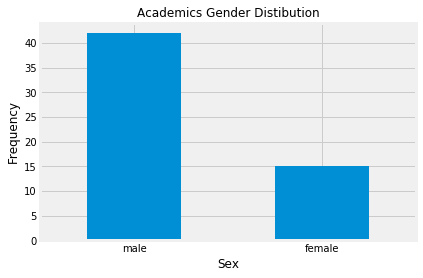

In [45]:
# Bar chart of Academics sex
salary.sx.value_counts().plot(kind='bar');
plt.xticks(rotation=0);
plt.xlabel('Sex');
plt.ylabel('Frequency');
plt.title('Academics Gender Distibution', color = 'black', fontsize = 12);

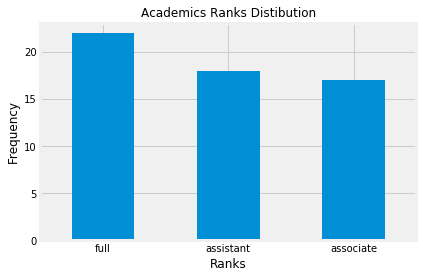

In [46]:
# Bar chart of Academics Ranks
salary.rk.value_counts().plot(kind='bar');
plt.xticks(rotation=0);
plt.xlabel('Ranks');
plt.ylabel('Frequency');
plt.title('Academics Ranks Distibution', color = 'black', fontsize = 12);

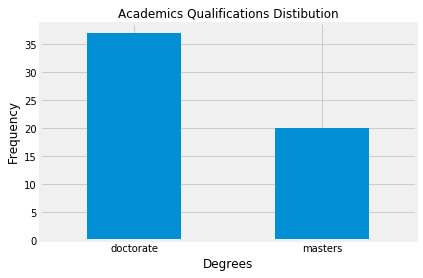

In [47]:
# Bar chart of Academics Degress
salary.dg.value_counts().plot(kind='bar');
plt.xticks(rotation=0);
plt.xlabel('Degrees');
plt.ylabel('Frequency');
plt.title('Academics Qualifications Distibution', color = 'black', fontsize = 12);

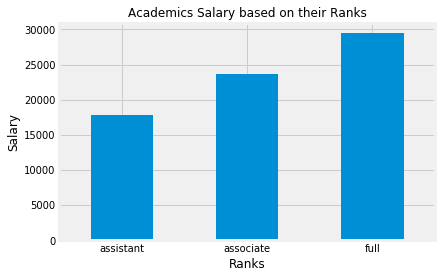

In [49]:
# Average salary of academics based on their rank
salary.groupby('rk').mean()['sl'].plot(kind="bar");
plt.xticks(rotation=0);
plt.xlabel('Ranks');
plt.ylabel('Salary');
plt.title('Academics Salary based on their Ranks', color = 'black', fontsize = 12);

In [ ]:
# Average years of service and years since last degree of academics based on their rank
salary.groupby('rk').mean()[['yr','yd']].plot(kind="bar");
plt.xticks(rotation=0);
plt.xlabel('Ranks');
plt.title('Academics Years of Service and \n Years since Last Degree based on their Ranks', color = 'black', fontsize = 12);

#### `4c. Which are continuous?`
salary (sl) is the only continues variable in the dataset.

#### `4c. Are any ordinal?`
rank (rk) and degree (dg) are ordinal variables.

#### `4d. BONUS: Include the skew of each continuous variable distribution in the title of the plot.`

In [ ]:
# Understand the distribution in salary variable
salary['sl'].agg(['min', 'max','mean', 'median', 'skew', 'kurt', 'std'])

In [ ]:
# Histogram of Salary Distibution including the skew function
bins = salary.sl.plot(kind='hist', bins=15, facecolor='blue', alpha=0.5, edgecolor='black', linewidth=0.75);
plt.xlabel('Salary');
plt.ylabel('Frequency');
plt.title("The skew of Salary Distibution is {0:0.3f}".format(salary['sl'].skew()), color = 'black',fontsize = 12);

#### `5. Visualize the relationships between series or columns in your dataframe.`
- `What type or types of plots are most appropriate here?`

    To address the relationship between two numerical variables, we can use scatterplot. 

#### `5a.`

In [ ]:
# Relationship between salary and years of service
salary.plot(kind='scatter', x='sl', y='yr');
plt.xlabel('Salary');
plt.ylabel('Years of Service');
plt.title("Relationship between Salary and Years of Service", color = 'black',fontsize = 12);

#### `5b.`

In [ ]:
# Relationship between salary and years since last Degree
salary.plot(kind='scatter', x='sl', y='yd');
plt.xlabel('Salary');
plt.ylabel('Years since last Degree');
plt.title("Relationship between Salary and Years since Last Degree", color = 'black',fontsize = 12);

#### `5c.`

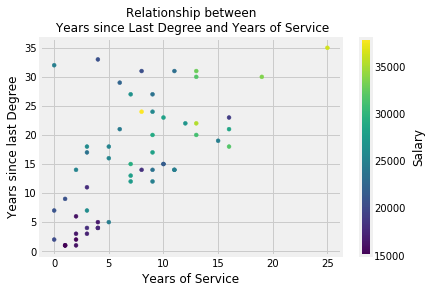

In [50]:
# Relationship between Years since Last Degree and Years of Service, 
# Vary point color by salary 
marker_size=15
plt.scatter(salary['yr'], salary['yd'], marker_size, c=salary['sl']);
plt.title("Relationship between\n Years since Last Degree and Years of Service", color = 'black',fontsize = 12);
plt.xlabel("Years of Service");
plt.ylabel("Years since last Degree");
cbar= plt.colorbar()
cbar.set_label("Salary", labelpad=+6);
plt.show();

In [ ]:
# As we have small dataset, we may be able to see all the relations between numerical variables
sns.pairplot(salary);

We can also use cat plots to visualize categrical variables.

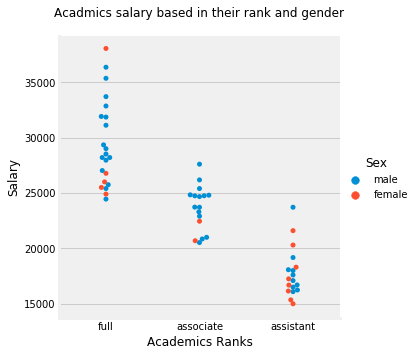

In [48]:
# Acadmics salary based in their rank and gender
ax = sns.catplot(x="rk", y="sl", data=salary, hue="sx", kind="swarm");
ax.set_axis_labels('Academics Ranks', 'Salary');
ax._legend.set_title('Sex')
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Acadmics salary based in their rank and gender');

In [ ]:
# Master and doctoral academics salary based on their rank and gender
ax = sns.catplot(x="rk", y="sl", col="dg" ,data=salary, hue="sx", jitter=False);
ax.set_axis_labels('Academics Ranks', 'Salary');
ax._legend.set_title('Sex');

#### `5d. Save at least one plot as a png file.`

In [ ]:
# Saving last plot to a file
ax = sns.catplot(x="rk", y="sl", col="dg" ,data=salary, hue="sx", jitter=False);
ax.set_axis_labels('Academics Ranks', 'Salary');
ax._legend.set_title('Sex');
plt.savefig('Degree_Ranks_Salary.png');    # Save to file!

#### `6. Check for correlation between variables in your dataframe.`

In [ ]:
# Change categrical variables into numerical using get_dummy
salary = pd.get_dummies(salary, columns=['sx', 'dg', 'rk'])
salary.head()

In [ ]:
salary.corr()

**- `Explain in a comment or in markdown form which variables have strong correlation and which have weak correlation`**
    
    From the correlation table above, we can look for variables that have a high coorelation number.
    
 I selected the **five** highest ones that have a correlation number above 0.5:
    
    - Full professor and salray have a corrolation of 0.76
    - Years of service and salary have a corrolation of 0.67
    - Years since last degree and salary have a corrolation of 0.66
    - Years since last degree and years of service have a corrolation of 0.63
    - Full professor and years since last degree have a corrolation of 0.54
    
 As for the weak correlations, we can see the top **five** weak ones below:
    
    - Assistant professor and salary have a corrolation of -0.75
    - Assistant professor and years since last degree have a corrolation of -0.66
    - Full professor and assistant professor have a corrolation of -0.54
    - Full professor and associate professor have a corrolation of -0.52
    - Doctoral holders and years since last degree have a corrolation of -0.42
     

#### - `Why might this matter?`

    1. It gives us more insights about the dataset and how are variables related to each other.
    2. It helps us in the prediction model later to better select the variables that have strong correlation.

#### `7. Now visualize that correlation output:`

In [ ]:
# The correlation heatmap
plt.subplots(figsize=(6,6))
plt.title("Correlation", color = 'black',fontsize = 12)
sns.heatmap(salary.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', 
            cmap= 'Blues', linewidths=0.2, linecolor='black');

#### `8. Write up a paragraph or two to explain the plot choices you made earlier in the notebook.`
- `Additionally, explain what you've learned about this dataset comparing salary data across gender and tenure lines for academics.`
- `Remember the line from the instructions: "Does your plot have a story? What should a reader take away from your plots?"`

**Plot Choices**

Plots have been chosen based on **(1)** variables types and **(2)** the message to be said. For numerical variables, I chose histogram and boxplot to better show the distribution of the variables. For categrical variables, I chose bar chart to show the frequency of each group of values in the variable.

Then to start getting sense of the relationship between the variables, I chose bar chart, scatter plot, pair plot, cat plot, and heatmap. 

To see the average of each group in the categorical variables compared to the numerical variables, I used the group by and mean functions with bar char. Things started to get interesting at this stage, so I created a couple of scatter plots to visualize the relationships between the numerical variables, and a pair plot to visualize every relationship between every pair of variables.

As for the cat polt, I chose the one with the properties that combines the view of scatter plots in its circles/volumes and bar chart in its organization. I was able to visualize multiple variables in one cat plot, thus showing more interesting results. Using this kind of plot helps me discover that gender and academic degrees don't have special relationships with salary which the heatmap plot later proves that too.

Then to see the correlation between all numerical variables in the dataset, I changed the categrial variables to numerical ones using get_dummy funtion to be able to visualize all the features using heatmap plot.

Through all the figures that need numerical variables, I tried to separate the salary from others as it has different range than them thus affecting the overal visualization.

Also, I made some search regarding the best visualization plots for represting numerical or categrical variables to help me better decide which kind of plot to use.

**What I have Learned from Salary Dataset?**

Although the dataset is complete; no null values, its numerical variables distributions don't show anomalous results, and we can see some indicators about some relations between variables, the final step we reached out to doesn't seem to be very promising for the next steps (modeling) as we don't have alot of interesting relationships with salary based on the correlation numbers. 

We may have seen that full professor has a correlation of 0.76 with salary which is a high number compared with everything else; however, it raises a question why asoociate and assistant professors don't have a notable relationship with salary though we can see the gradual increase between the three ranks?

It might be the reason that we don't have enough data, we need to collect more data; this dataset has only 57 observations which is a small number if we want to build, train, and test a model based on it.

- Salary Data Visualization Assignement
- Solved and Submitted by Arwa Alamoudi - 12/4/2020